In [2]:
import main

In [3]:
df = main.load_initial_dataset()

Trying to load the cached dataframe...
No cached dataframe, loading the dataset from disk
Caching the dataframe


In [4]:
import numpy as np
import pandas as pd
from pandas import Grouper

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style(style="darkgrid")
from pathlib import Path
from matplotlib import rcParams

# Default text styling for figures
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Inter']
rcParams['font.weight'] = 500
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17

figOutputPath = Path("../figures/")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

[Text(1, 0, '0'),
 Text(1, 0, '5K'),
 Text(1, 0, '10K'),
 Text(1, 0, '15K'),
 Text(1, 0, '20K'),
 Text(1, 0, '25K')]

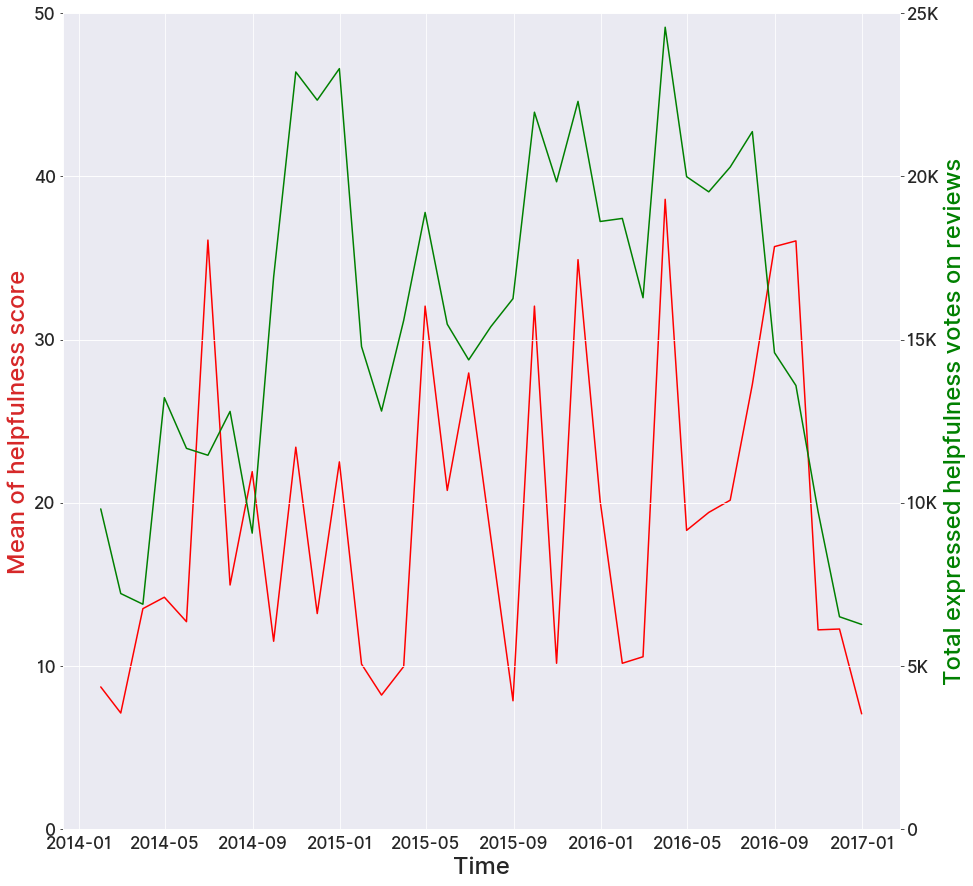

In [11]:
## Time series analysis

# 8
fig, ax1 = plt.subplots(figsize=(15, 15))
# Parse the UNIX datestamp
df.unixReviewTime = pd.to_datetime(df.unixReviewTime, unit='s')
# Order by helpfulness vote
df = df.sort_values("vote",ascending=False)

df2 = df[(df['unixReviewTime'] > '2014-1-1') & (df['unixReviewTime'] <= '2016-12-31')]

# Group by Month
timegrouped = df2.groupby(Grouper(key='unixReviewTime', freq='1M'))
# List resulting groups: grouped_df.groups.keys()
# Cumulative sum reviews during time
timegrouped.size().cumsum().reset_index(name="Count").set_index('unixReviewTime')
# Keep the 25 most helpful reviews per each period of time (1M)
top25time = timegrouped.head(20)
# Regroup
top25time = top25time.groupby(Grouper(key='unixReviewTime', freq='1M'))
# Plot the mean of helpfulness score on each period
color = 'tab:red'
ax1.set_xlabel('Time', size=24, fontweight=500)
ax1.set_ylabel('Mean of helpfulness score', color=color, size=24, fontweight=500)

ax1.plot(top25time["vote"].mean(), color="red")
ax2 = ax1.twinx()
ax1.set_ylim([0,50])

ax2.plot(timegrouped["vote"].sum(), color="green")
ax2.set_ylim([0,25000])
ax2.set_ylabel('Total expressed helpfulness votes on reviews', color="green", size=24, fontweight=500)
ax2.set_yticks([0, 5000, 10000, 15000,20000,25000])
ax2.set_yticklabels(["0", "5K", "10K", "15K", "20K", "25K"])



In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 15))

df2 = df[(df['unixReviewTime'] > '2013-1-1') & (df['unixReviewTime'] <= '2017-12-31')]

timegroupedF = df2.loc[df2['verified']==False].groupby(Grouper(key='unixReviewTime', freq='2M'))
timegroupedT = df2.groupby(Grouper(key='unixReviewTime', freq='2M'))

ax1.plot(timegroupedF.size() / timegroupedT.size(), color="green")

ax2 = ax1.twinx()
ax2.plot(timegroupedT.size(), color="red")

ax2.set_yticks([0, 5000, 10000, 15000,20000,25000])
ax2.set_yticklabels(["0", "5K", "10K", "15K", "20K", "25K"])
ax1.set_ylim([0,1])

ax2.set_ylabel('Total reviews', color="red", size=24, fontweight=500)
ax1.set_ylabel('Ratio of unverified reviews', color="green", size=24, fontweight=500)
ax1.set_xlabel('Time', size=24, fontweight=500)
